
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [45]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for creating plots and customizing figures
import pylab # used for plotting and numerical calculations
import pingouin as pg # used for correlation analyses and tests for normality

df_mh = pd.read_csv('MillerHadenData.csv')



In [46]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
df_mh.info()

#Participant: Nominal variable, used to identify each participant.
#Abil (Reading Ability) and IQ: Ratio variables, as they can have a meaningful zero point, and the distance between values is consistent.
#Home and TV: Ratio variables since they measure time spent on activities in minutes, with a meaningful zero and consistent intervals.


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [47]:
# Q1b (code):
# Check for missing values
missing_values = df_mh[['Abil', 'IQ']].isnull().sum()
missing_values


# Check whether there is a data point for each participant on both variables
# The dataset has no missing values for both Abil (Reading Ability) and IQ. There is a data point for each participant.


Abil    0
IQ      0
dtype: int64

In [48]:
# Q1c (code):
# Check data distribution
abil_normality = pg.normality(df_mh['Abil'])
iq_normality = pg.normality(df_mh['IQ'])
print(abil_normality, iq_normality)



             W      pval  normal
Abil  0.948795  0.235491    True            W      pval  normal
IQ  0.963604  0.490811    True


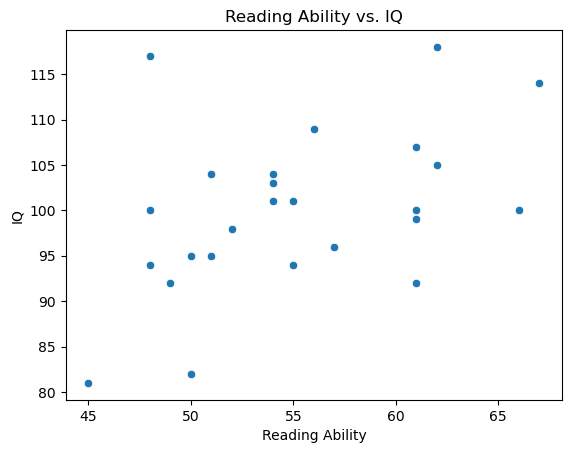

In [49]:
# Q1d (code):
# Scatter plot
sns.scatterplot(x='Abil', y='IQ', data=df_mh)
plt.title('Reading Ability vs. IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()




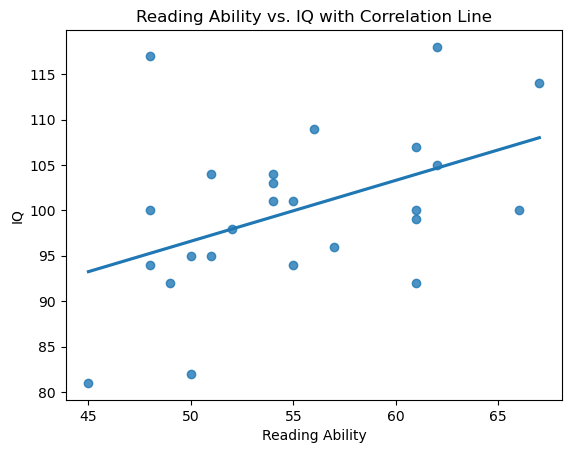

In [50]:
# Q1e (code):
# Correlation line
sns.regplot(x='Abil', y='IQ', data=df_mh, ci=None)
plt.title('Reading Ability vs. IQ with Correlation Line')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()


**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):


Pearson, because:
1. The data for both variables, Reading Ability ('Abil') and IQ, are normally distributed as indicated by the Shapiro-Wilk test results (p-values > 0.05), making it appropriate for Pearson's test, which assumes normality of the data.
2. Both variables are measured on a ratio scale.
3. The scatter plot did not indicate any outliers that would significantly skew the results, making Pearson's correlation a suitable choice for analyzing the linear relationship between these two variables.


In [51]:
# Q2b (code):
# Conduct a Pearson correlation coefficient test between 'Abil' and 'IQ'
pearson_corr = df_mh[['Abil', 'IQ']].corr(method='pearson')
print(pearson_corr)


         Abil       IQ
Abil  1.00000  0.45117
IQ    0.45117  1.00000


# Q2c (answer with words):
The correlation coefficient between Abil (Reading Ability) and IQ is 0.45117. This indicates a moderate positive linear relationship between the two variables. As Reading Ability increases, IQ tends to increase as well, but the relationship is not very strong. It's moderate, suggesting other factors may also play significant roles in determining IQ levels apart from Reading Ability.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):
# H0:There is no significant difference in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability).
# H1：There is a significant difference in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability).

In [52]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  #used for data manipulation and analysis
from scipy.stats import chi2_contingency #used for performing the Chi-square test

# Define the rounded average for Reading Ability and Home
avg_abil = round(df_mh['Abil'].mean())
avg_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'High' if x > avg_abil else 'Low')


# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Frequent' if x > avg_home else 'Infrequent')

# Display the first few rows to verify the new columns
print(df_mh.head())

   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      High    Frequent
1            2    56  109   123  608      High  Infrequent
2            3    45   81   108  640       Low  Infrequent
3            4    66  100   155  493      High    Frequent
4            5    49   92   103  636       Low  Infrequent


In [53]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print(contingency_matrix)

Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [54]:
# Q3d (code):
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_matrix)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 6.500270562770561, p-value: 0.010785807794066234


# Q3e (answer in words):

The p-value obtained from the Chi-square test is less than the commonly used significance level of 0.05. This indicates that we can reject the null hypothesis (H0). There is a statistically significant association between a person's reading ability and the frequency of reading at home.

The finding implies that the frequency of reading at home is not independent of reading ability; instead, it depends on whether individuals have high or low reading abilities. This could mean that individuals with higher reading abilities tend to spend more (or less) time reading at home compared to those with lower reading abilities.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [55]:

import pandas as pd # used for data manipulation and analysis
from scipy import stats # used for statistical functions
import numpy as np # used for numerical operations
import matplotlib.pyplot as plt # used for creating static, interactive, and animated visualizations
import seaborn as sns # used for making statistical graphics 

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [56]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()  # Calculate the mean age, ignoring missing values by default
std_age = df_evaluators['age'].std()  # Calculate the standard deviation for age
print(f"Mean age of evaluators: {mean_age}, Standard deviation of age: {std_age}")

Mean age of evaluators: 30.852941176470587, Standard deviation of age: 6.238358141327351


In [57]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = df_evaluators[df_evaluators['sex'] == 1].count()['sex']
female_count = df_evaluators[df_evaluators['sex'] == 2].count()['sex']
print(f"Number of male evaluators: {male_count}, Number of female evaluators: {female_count}")

Number of male evaluators: 4, Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [58]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [59]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]


# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'


# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]


# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)


# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2_with_condition = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')


# Select only the necessary columns as per the structure required
ratings2 = ratings2_with_condition[['eval_id', 'Category', 'Rating', 'condition']]


# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])


# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):
# Null hypothesis:
There is no significant difference between overall ratings on the intellect, hire, and impression scales between evaluators who listened to resume pitches and evaluators who read the resume pitches. H0: μ_listened = μ_read, where μ represents the mean rating for each condition.
# Alternative hypothesis:
There will be a significant difference between overall ratings on the intellect, hire, and impression scales between evaluators who listened to resume pitches and evaluators who read the resume pitches. H1: μ_listened ≠ μ_read for each trait, indicating that the means are not equal and suggesting a significant difference in ratings based on the condition.


We could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
We should choose a two-tailed t-test for this analysis. This is because we are interested in detecting any significant difference between the two groups, regardless of the direction of the difference. The alternative hypothesis does not specify the direction of the difference (either higher or lower) in ratings between the listened and read groups, but simply that there will be a difference.

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
The independent variable is the condition under which the resume pitches were delivered to the evaluators, which has two levels - listened and read. This is because it is the variable we manipulate to observe its effect on the ratings.

The dependent variables are the overall ratings given by the evaluators on the intellect, hire, and impression scales. This is because they are the outcomes we measure to see if there was an effect based on the condition (listened vs. read).


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [60]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()


# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}
for category in ['intellect', 'impression', 'hire']:
    for condition in ['listened', 'read']:
        ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == condition)]['Rating']
        shapiro_results[f'{category}_{condition}'] = shapiro(ratings)


# Test for homogeneity of variances (Levene's test)
levene_results = {}
for category in ['intellect', 'impression', 'hire']:
    ratings_listened = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    ratings_read = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    levene_results[category] = levene(ratings_listened, ratings_read)


# Independent t-tests
ttest_results = {}
for category in ['intellect', 'impression', 'hire']:
    ratings_listened = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    ratings_read = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    ttest_results[category] = ttest_ind(ratings_listened, ratings_read)

ratings_desc, shapiro_results, levene_results, ttest_results

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

#Q7b (answer in words):
Why These Tests:
Shapiro-Wilk Test checks if the data is normally distributed, a prerequisite for conducting t-tests.
Levene's Test ensures that variances between the two groups are equal, another assumption for t-tests.
Independent T-tests determine if there are statistically significant differences between the mean ratings of the listened and read groups.

Decisions Based on Test Results:
Normality and Homogeneity: The assumptions for conducting independent t-tests are met, as indicated by the Shapiro-Wilk and Levene's tests. This validates the choice of using t-tests for our analysis.
T-test Interpretation:
Intellect, Impression, and Hire Ratings: The significant p-values (p < 0.05) for all three categories indicate that there are statistically significant differences between the listened and read groups' ratings. Specifically, evaluators who listened to the pitches gave significantly higher ratings for intellect, impression, and hire compared to those who read the pitches.
This suggests that the mode of presentation (listening vs. reading) has a significant impact on evaluators' perceptions of the candidates, with listening being associated with higher evaluations.
These findings support the hypothesis that the manner in which job candidates' pitches are delivered can influence evaluators' ratings, potentially due to the richer, more engaging nature of spoken presentations compared to written ones.